In [ ]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
import pylab
from scipy import ndimage
%matplotlib inline

In [2]:
image = cv2.imread('pestimg.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.png',gray_image)
cv2.imshow('color_image',image)
cv2.imshow('gray_image',gray_image) 
cv2.waitKey(0)                 # Waits forever for user to press any key
cv2.destroyAllWindows()

In [3]:
image = cv2.imread('gray_image.png')
cv2.getGaussianKernel(9,9)
blur= cv2.GaussianBlur(image,(5,5),0)
cv2.imwrite('blur.png',blur)
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()


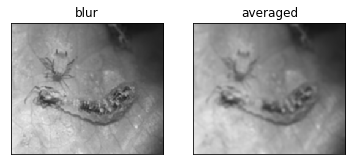

True

In [5]:
image=cv2.imread('blur.png')
kernel=np.ones((5,5),np.float32)/25
dst= cv2.filter2D(image,-1,kernel)
plt.subplot(121),plt.imshow(image),plt.title('blur')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('averaged')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('averaged.png',dst)

In [ ]:
image = cv2.imread('averaged.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imwrite('thresh_image.jpg',thresh)
cv2.imshow('thresh_image',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

 # noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
cv2.imshow('opening',thresh)
cv2.waitKey(0)                 # Waits forever for user to press any key   
cv2.destroyAllWindows()


# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
cv2.imshow('sure_bg',sure_bg)
cv2.waitKey(0)                 # Waits forever for user to press any key   
cv2.destroyAllWindows()
print("No. of pests in the image: ")
labelarray, particle_count = ndimage.measurements.label(sure_bg)
print(particle_count)
#pylab.figure(1)
#pylab.imshow(im_thresholded)
#pylab.show()